In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
transport = pd.read_csv('events_month.csv')
transport.rename(columns={'vehicle_location_longitude':'long','vehicle_location_latitude':'lat'}, inplace=True)
transport.head()

,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,signMessageLong,tripID,vehicle_id,long,lat
0,42,-138,2017-01-01 00:05:35,10572,23,10574,24,MAX Red Line to Airport,6997146,416,-122.563200,45.560901
1,270,-107,2017-01-01 00:07:26,10574,24,10576,25,MAX Red Line to Airport,6997146,416,-122.561480,45.572588
2,299,-138,2017-01-01 00:10:39,10576,25,10579,26,MAX Red Line to Airport,6997146,416,-122.571721,45.580453
3,1,-136,2017-01-01 00:04:51,11616,22,10572,23,MAX Red Line to Airport,6997146,416,-122.567106,45.556137
4,42,-138,2017-01-01 00:05:35,10572,23,10574,24,MAX Red Line to Airport,6997146,417,-122.563200,45.560901


In [104]:
transport.loc[transport.vehicle_id == 416]

,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,signMessageLong,tripID,vehicle_id,long,lat


In [106]:
len(transport.signMessageLong.unique())
transport.signMessageLong.unique()

array(['MAX  Red Line to Airport',
       'MAX  Red Line to City Center & Beaverton',
       'MAX  Blue Line to Gresham',
       'MAX  Blue Line to Ruby Junction/E 197th Ave',
       'MAX  Blue Line to Elmonica/170th', 'MAX  Blue Line to Hillsboro',
       'MAX  Blue Line to Willow Creek/SW 185th Ave',
       'MAX  Yellow Line to Expo Center',
       'MAX  Yellow Line to City Center/Milwaukie',
       'MAX  Yellow Line to Interstate/Rose Quarter',
       'MAX  Green Line to Clackamas Town Center',
       'MAX  Green Line to Gateway TC',
       'MAX  Green Line to City Center/PSU',
       'MAX  Orange Line to City Center/Expo Center',
       'MAX  Orange Line to City Center/PSU',
       'MAX  Orange Line to Milwaukie', 'MAX  Blue Line to Gateway TC',
       'MAX  Blue Line to City Center', 'MAX  Blue Line to Rose Qtr',
       'MAX  To City Center', 'MAX  Yellow Line to City Center/PSU'],
      dtype=object)

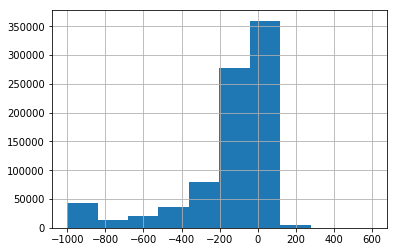

In [86]:
transport['delay'].hist()
plt.show()

In [87]:
vehicle = transport.groupby(['vehicle_id']).mean().add_suffix('_avg').reset_index()

In [88]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
vehicle_id         140 non-null int64
bearing_avg        140 non-null float64
delay_avg          140 non-null float64
lastLocID_avg      140 non-null float64
lastStopSeq_avg    140 non-null float64
nextLocID_avg      140 non-null float64
nextStopSeq_avg    140 non-null float64
tripID_avg         140 non-null float64
long_avg           140 non-null float64
lat_avg            140 non-null float64
dtypes: float64(9), int64(1)
memory usage: 11.0 KB


In [89]:
station = transport.groupby(['nextLocID']).mean().reset_index()

In [90]:
station.head()

,nextLocID,bearing,delay,lastLocID,lastStopSeq,nextStopSeq,tripID,vehicle_id,long,lat
0,7601,191.105277,-138.924027,9685.979786,12.328042,12.424773,7.092401e+06,313.683218,-122.667438,45.529701
1,7606,201.699018,-138.665108,7618.000000,8.288120,9.288120,7.095517e+06,314.682180,-122.682648,45.509532
2,7608,200.977266,-177.584999,7646.000000,11.009557,12.009557,7.090838e+06,309.957718,-122.677951,45.518049
3,7618,200.000000,-84.801597,7608.000000,12.009556,13.009556,7.090843e+06,309.424618,-122.680413,45.513548
4,7627,178.241143,-155.714000,9303.000000,9.013714,10.013714,7.090927e+06,309.027429,-122.675427,45.523503


In [91]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df.head()

,iata,airport,city,state,country,lat,long,cnt
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781


In [97]:
station.delay = station.delay*(-1)
station.delay

0      138.924027
1      138.665108
2      177.584999
3       84.801597
4      155.714000
5      163.650528
6      160.353831
7      115.668599
8      151.997465
9      182.883074
10     100.132231
11      96.971593
12      29.865561
13      98.618693
14      83.068887
15     125.381944
16     108.725596
17     132.334318
18     161.644727
19     157.429234
20     148.874965
21     163.367786
22     168.832436
23     190.213323
24     203.474936
25     301.370378
26     258.793010
27     308.792501
28     317.621633
29     295.345125
          ...    
142    112.319338
143     82.665583
144     76.265532
145     32.890714
146     10.523724
147     73.569628
148     19.975652
149     28.675926
150    314.327298
151     12.428571
152     94.266559
153     72.628971
154    168.221234
155    191.793531
156    200.690289
157    213.822440
158    210.914905
159    196.663597
160    178.788702
161    128.320519
162     63.464251
163     89.954901
164     80.976813
165    102.052504
166    117

In [140]:
station['text'] = station['nextLocID'].astype(str)

scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = station['long'],
        lat = station['lat'],
        text = station['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = station['delay'],
            cmax = station['delay'].max(),
            colorbar=dict(
                title="Incoming flightsFebruary 2011"
            )
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        colorbar = True,
        geo = dict(
            scope='usa',
            showland = True,
            showrivers= True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-airports' )

In [141]:
import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'California']

values = df_sample_r['TOT_POP'].tolist()
fips = df_sample_r['FIPS'].tolist()

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA', 'AZ', 'Nevada', 'Oregon', ' Idaho'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population by County', title='California and Nearby States'
)
py.iplot(fig, filename='choropleth_california_and_surr_states_outlines')

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

`pip install geopandas==0.3.0`
`pip install pyshp==1.2.10`
`pip install shapely==1.6.3`

If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/